<a href="https://colab.research.google.com/github/rohan-pradhan/BitPlaneSlicingAdversarialDefense/blob/master/FGSM_AdverserialExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans

    100% |████████████████████████████████| 51kB 2.5MB/s 


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

import os
import time
import re

import tensorflow as tf
from tensorflow.python.platform import flags
import numpy as np
from tensorflow import keras
# import keras
# from tensorflow.keras import backend
import pandas as pd 

from cleverhans.attacks import FastGradientMethod
from cleverhans.dataset import MNIST
from cleverhans.loss import CrossEntropy
from cleverhans.train import train
from cleverhans.utils import AccuracyReport
from cleverhans.utils_keras import cnn_model
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.utils_tf import model_eval
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from cleverhans.attacks import CarliniWagnerL2
from cleverhans.attacks import FastGradientMethod 

import glob
FLAGS = flags.FLAGS

NB_EPOCHS = 6
BATCH_SIZE = 128
LEARNING_RATE = .001
TRAIN_DIR = 'train_dir'
FILENAME = 'mnist.ckpt'
LOAD_MODEL = False




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/ECE1512-FinalProject/saved_models
!ls $pwd
!ls ./drive/My\ Drive/ECE1512-FinalProject/saved_models

# mkdir saved_models

keras_cifar10_trained_model_nonsliced.h5
ls: cannot access '[/content]': No such file or directory
keras_cifar10_trained_model_nonsliced.h5


In [0]:
pwd = !pwd
saved_models_directory = "./drive/My\ Drive/ECE1512-FinalProject/saved_models"
classifier_file_name = "keras_cifar10_trained_model_nonsliced.h5"
# model_path = os.path.join(pwd, saved_models_directory)
# model_path = os.path.join(model_path, classifier_file_name)
# print(model_path)

classifier = tf.keras.models.load_model("keras_cifar10_trained_model_nonsliced.h5")
import random
random.seed = 99

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
# # Args
# FLAGS = flags.FLAGS

# VIZ_ENABLED = True
# BATCH_SIZE = 128
# NB_EPOCHS = 6
# SOURCE_SAMPLES = 10
# LEARNING_RATE = .001
# CW_LEARNING_RATE = .005
# ATTACK_ITERATIONS = 100
# MODEL_PATH = ''
# TARGETED = False

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print (x_test.shape[1:4])
print (type(x_test))


Using TensorFlow backend.


170500096/170498071 [==============================] - 24s 0us/step
(32, 32, 3)
<class 'numpy.ndarray'>


In [0]:
def fgsm_attack(src,folder_num, eps):
    """
    MNIST CleverHans tutorial
    :param train_start: index of first training set example
    :param train_end: index of last training set example
    :param test_start: index of first test set example
    :param test_end: index of last test set example
    :param nb_epochs: number of epochs to train model
    :param batch_size: size of training batches
    :param learning_rate: learning rate for training
    :param train_dir: Directory storing the saved model
    :param filename: Filename to save model under
    :param load_model: True for load, False for not load
    :param testing: if true, test error is calculated
    :param label_smoothing: float, amount of label smoothing for cross entropy
    :return: an AccuracyReport object
    """
    tf.keras.backend.set_learning_phase(0)


    # Set TF random seed to improve reproducibility
    tf.set_random_seed(1234)

#     if not hasattr(backend, "tf"):
#         raise RuntimeError("This tutorial requires keras to be configured"
#                            " to use the TensorFlow backend.")

#     if keras.backend.image_dim_ordering() != 'tf':
#         keras.backend.set_image_dim_ordering('tf')
#         print("INFO: '~/.keras/keras.json' sets 'image_dim_ordering' to "
#               "'th', temporarily setting to 'tf'")

#     img_folder = src+'/*/*.jpg'
    
#     dest_folder = 'CW_Phase'+str(folder_num)+'CW_LR'+str(CW_LEARNING_RATE)    
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)
#     m = dest_folder + '/Male'
#     f = dest_folder + '/Female'
#     if not os.path.exists(m):
#         os.makedirs(m)
#     if not os.path.exists(f):
#         os.makedirs(f)
    
        
#     dest_folder = dest_folder
    

#     x_celeba = np.array(x_test)
    # Obtain Image Parameters

    #ADD RIGHT DATA 
    img_rows, img_cols, nchannels = x_test.shape[1:4]

    #MALE OR FEMALE 
    nb_classes = 10

    # Define input TF placeholder
    x = tf.placeholder(tf.float32, shape=(None, img_rows, img_cols,
                                        nchannels))
    y = tf.placeholder(tf.float32, shape=(None, nb_classes))


    keras_wrapped_model = KerasModelWrapper(classifier)
    
    

    # get session from the model
    sess =keras.backend.get_session()
    # create attack object
    adv_ys = None
#     yname = "y"
#     VIZ_ENABLED = True
#     BATCH_SIZE = 128
#     NB_EPOCHS = 6
#     SOURCE_SAMPLES = 10
#     LEARNING_RATE = .001
#     ATTACK_ITERATIONS = attack_iterations

#     cw = CarliniWagnerL2(keras_wrapped_model, sess=sess)

#     cw_params = {'binary_search_steps': 1,
#                yname: adv_ys,
#                'max_iterations': ATTACK_ITERATIONS,
#                'learning_rate': CW_LEARNING_RATE,
#                'batch_size': 10,
#                'initial_const': 10}
    
    fgsm = FastGradientMethod(keras_wrapped_model, sess=sess)
    
    fgsm_params = {'eps': eps,
                 'clip_min': 0.,
                 'clip_max': 1.}

    adv_x = fgsm.generate_np(x_test,**fgsm_params)


    # Consider the attack to be constant
    adv_x = tf.stop_gradient(adv_x) 
    attack_images = adv_x.eval(session =sess)
#     y = np.concatenate([np.ones(50),np.zeros(50)])

    
    adv_pred = classifier.predict_classes(attack_images)
    # accuracy score
    
    acc = accuracy_score(y_test, adv_pred)
    adv_prob = classifier.predict_proba(attack_images)
#     probcsv = dest_folder + '/Pred_prob.csv' 
    
    
#     df = pd.DataFrame(adv_prob)
#     df = pd.concat([pd.Series(addrs),df],axis=1)
#     df.to_csv(probcsv)
    
#     reg = src
    
#     adv_addrs = [re.sub(reg,dest_folder,x) for x in addrs]
  
    file_string = "attack_images_np_" + str(folder_num) +".npy"
    
    np.save(file_string, attack_images)
    
#     for i, a in enumerate(attack_images):
#         plt.imsave(adv_addrs[i],a)


    return(acc)


In [0]:
img_folder = "da"
eps_list = [0.005, 0.009, 0.02, 0.04, 0.07]
acc_list = []

for count, value in enumerate(eps_list):
  print ("Attacking model with FGSM attack with ", value, " epsilon.")
  acc = fgsm_attack(img_folder,count+1, value)
  acc_list.append(acc)
  print (acc)

/content/src/cleverhans/cleverhans/attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2019-03-25 13:53:57,613 cleverhans] Constructing new graph for attack FastGradientMethod


Attacking model with FGSM attack with  0.005  epsilon.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
dim is deprecated, use axis instead


/content/src/cleverhans/cleverhans/compat.py:23: UserWarning: <function reduce_max_v1 at 0x7f131498c840> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
/content/src/cleverhans/cleverhans/compat.py:23: UserWarning: <function reduce_sum_v1 at 0x7f1314987b70> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2019-03-25 13:54:08,917 cleverhans] Constructing new graph for attack FastGradientMethod


0.539
Attacking model with FGSM attack with  0.009  epsilon.


[INFO 2019-03-25 13:54:13,296 cleverhans] Constructing new graph for attack FastGradientMethod


0.3957
Attacking model with FGSM attack with  0.02  epsilon.


[INFO 2019-03-25 13:54:17,660 cleverhans] Constructing new graph for attack FastGradientMethod


0.2339
Attacking model with FGSM attack with  0.04  epsilon.


[INFO 2019-03-25 13:54:21,952 cleverhans] Constructing new graph for attack FastGradientMethod


0.1665
Attacking model with FGSM attack with  0.07  epsilon.
0.1392


In [0]:
# acc = cw_attack(100,im g_folder,0.07,1)
adv_img = np.load("attack_images_np_5.npy")

0.1392


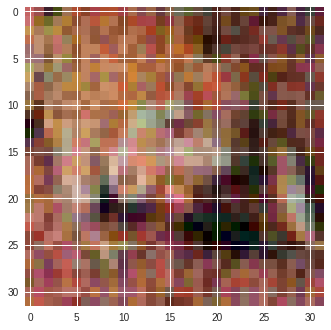

In [0]:
import cv2 
print (acc)
adv_img.shape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# norm_image = cv2.normalize(adv_img[3], None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)


plt.imshow(adv_img[5])


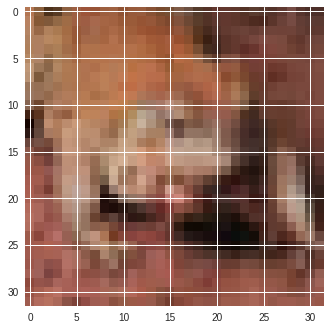

In [0]:
plt.imshow(x_test[5])

0.1067


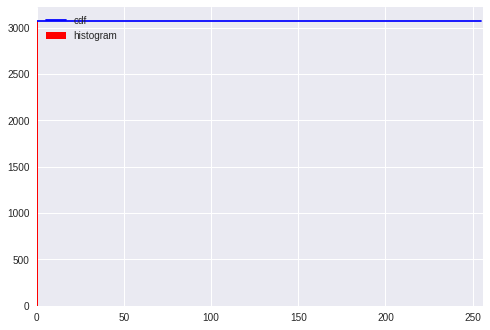

In [0]:
import cv2 
print (acc)
adv_img.shape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


adv_img = np.load("attack_images_np.npy")
img = adv_img[5]
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [0]:
folder_num = 1
file_string = "attack_images_np_" + str(folder_num) +".npy"
print (file_string)

attack_images_np_1.npy
